In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Find the most recent date in the data set using method from https://stackoverflow.com/questions/4186062/sqlalchemy-order-by-descending
from sqlalchemy import desc
recent_date = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()
recent_date



('2017-08-23')

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
import datetime as dt
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(year_ago)


2016-08-23


In [13]:
# Perform a query to retrieve the data and precipitation scores
date = dt.datetime(2016, 8, 23)

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > date).group_by(Measurement.date).order_by(Measurement.date).all()

In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'prcp'])
df.set_index('date', inplace=True)
df

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-19,0.00
2017-08-20,0.00
2017-08-21,0.00


In [15]:
# Sort the dataframe by date
df=df.sort_values(by = 'date')
df

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-19,0.00
2017-08-20,0.00
2017-08-21,0.00


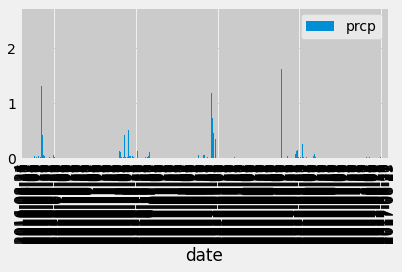

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot.bar()
plt.tight_layout()
plt.show()

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,prcp
count,363.000000
mean,0.048843
std,0.205197
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.name)).all()

[(9)]

In [19]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).first()


('USC00519397', 19550)

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_id = "USC00519397"
results = session.query(func.avg(Measurement.tobs), func.max(Measurement.tobs),func.min(Measurement.tobs)).\
filter(Measurement.station == station_id).\
order_by(Measurement.date).all()
results

[(74.55323054331865, 87.0, 56.0)]

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
date = dt.datetime(2016, 8, 23)

results = session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.date > date).\
filter(Measurement.station == station_id).\
group_by(Measurement.date).\
order_by(Measurement.date).all()

In [22]:
df_station = pd.DataFrame(results, columns=['date', 'tobs'])
df_station.set_index('date', inplace=True)
df_station

,tobs
date,
2016-08-24,79.0
2016-08-25,80.0
2016-08-26,79.0
2016-08-27,77.0
2016-08-28,78.0
...,...
2017-08-19,79.0
2017-08-20,81.0
2017-08-21,81.0


In [23]:
df_station=df_station.sort_values(by = 'date')
df_station

,tobs
date,
2016-08-24,79.0
2016-08-25,80.0
2016-08-26,79.0
2016-08-27,77.0
2016-08-28,78.0
...,...
2017-08-19,79.0
2017-08-20,81.0
2017-08-21,81.0


# Close session

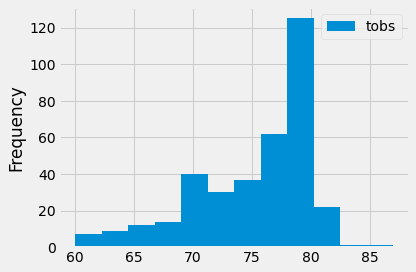

In [24]:
df_station.plot.hist(bins=12)
plt.tight_layout()
plt.show()

In [25]:
# Close Session
session.close()